Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6202 - loss: 0.6623 - val_accuracy: 0.2682 - val_loss: 0.9179
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6539 - loss: 0.6145 - val_accuracy: 0.5336 - val_loss: 0.7472
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6964 - loss: 0.5795 - val_accuracy: 0.7572 - val_loss: 0.5407
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7233 - loss: 0.5461 - val_accuracy: 0.6544 - val_loss: 0.6434
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7434 - loss: 0.5193 - val_accuracy: 0.7742 - val_loss: 0.5100
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7590 - loss: 0.5006 - val_accuracy: 0.5616 - val_loss: 0.7759
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7815 - loss: 0.4697 - val_accuracy: 0.6896 - val_loss: 0.6084
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7849 - loss: 0.4532 - val_acc

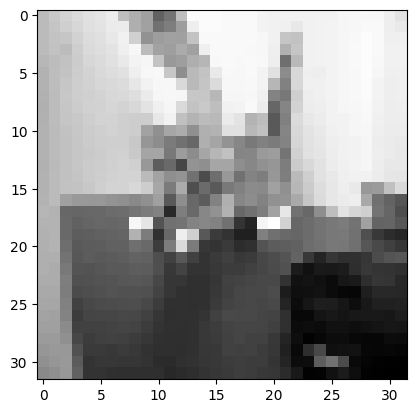

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import cv2

#Data Retrieval
import os

path = os.path.join("./ieee-ai-and-ml-demystified/train/train","")


for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(32, 32))
    plt.imshow(new_img_array,cmap="gray")
    break
    
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(32, 32))
        X.append(new_img_array)
        y.append(category)


create_test_data(path)
X = np.array(X).reshape(-1, 32,32,1)
y = np.array(y)

X = X/255.0

from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

path1 = os.path.join("./ieee-ai-and-ml-demystified/test1/test1","")

X_test = []
id_line = []
def create_test1_data(path1):
    for p in os.listdir(path1):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path1,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(32, 32))
        X_test.append(new_img_array)
create_test1_data(path1)
X_test = np.array(X_test).reshape(-1,32,32,1)
X_test = X_test/255


predictions = model.predict(X_test)

predicted_val = [int(round(p[0])) for p in predictions] 

predicted_val[0:5]


submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val}) 

submission_df.to_csv("submission123.csv", index=False)
 